# PROJECT
## Applications of Big Data

### 0. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv('dataset/merged_data.csv')
df.columns

Index(['id', 'created_at', 'rating', 'title', 'content', 'thank_count',
       'customer_name', 'customer_id', 'product_id', 'year', 'month', 'day',
       'hour', 'weekday', 'name', 'price', 'original_price', 'discount_rate',
       'quantity_sold', 'rating_average', 'review_count', 'seller_id',
       'category', 'seller_name', 'author_name'],
      dtype='object')

In [3]:
df.head()

,id,created_at,rating,title,content,thank_count,customer_name,customer_id,product_id,year,...,price,original_price,discount_rate,quantity_sold,rating_average,review_count,seller_id,category,seller_name,author_name
0,12559756,2021-10-11 14:01:12,5,Cực kì hài lòng,"Có những người bước đến, họ lấp đầy hạnh phúc ...",389,Vân Anh,22051463,74021317,2021,...,68040,108000,37,70416,5.0,13151,1,tiểu thuyết,Tiki Trading,josé mauro de vasconcelos
1,16979365,2022-07-07 15:01:37,5,Cực kì hài lòng,"Thấy nhiều bạn chê tiki gói hàng quá, may sao ...",14,Phan Thảo Yến Nhím,27791831,74021317,2022,...,68040,108000,37,70416,5.0,13151,1,tiểu thuyết,Tiki Trading,josé mauro de vasconcelos
2,14069617,2021-12-25 14:33:51,5,Cực kì hài lòng,"Bìa cực xinh, tiki giao hàng nhanh, sách không...",26,Trần Thị Trang,17748750,74021317,2021,...,68040,108000,37,70416,5.0,13151,1,tiểu thuyết,Tiki Trading,josé mauro de vasconcelos
3,12322259,2021-09-25 11:17:51,5,Cực kì hài lòng,"Nội dung của sách thì không phải bàn đến rồi, ...",16,Khánh Ly,10149686,74021317,2021,...,68040,108000,37,70416,5.0,13151,1,tiểu thuyết,Tiki Trading,josé mauro de vasconcelos
4,18368714,2022-12-07 18:48:33,5,Cực kì hài lòng,Một cuốn sách rất đáng đọc về tình yêu thương ...,1,Phương Linh,28545286,74021317,2022,...,68040,108000,37,70416,5.0,13151,1,tiểu thuyết,Tiki Trading,josé mauro de vasconcelos


In [4]:
df.shape

(590483, 25)

#### 2. Preparing the data

In [5]:
df = df[df['year'] >= 2020]
df.shape

(582571, 25)

Theo thể loại (cột `category`)

In [6]:
data = df[df['year'] >= 2021]

In [7]:
top10_category = data.groupby('category').sum().sort_values(by='quantity_sold', ascending=False).head(10)

C:\Users\HoaTX\AppData\Local\Temp\ipykernel_18804\4032574329.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top10_category = data.groupby('category').sum().sort_values(by='quantity_sold', ascending=False).head(10)


In [8]:
top10_category['quantity_sold'].sum() / df['quantity_sold'].sum()

0.7533494311063347

In [9]:
top10_category = df.groupby('category').sum().sort_values(by='quantity_sold', ascending=False).head(10).index
df['theloai'] = df['category'].apply(lambda x: 1 if x in top10_category else 0)

C:\Users\HoaTX\AppData\Local\Temp\ipykernel_18804\1569849450.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top10_category = df.groupby('category').sum().sort_values(by='quantity_sold', ascending=False).head(10).index


Top 10 thể loại có có lượng bán nhiều nhất đều liên tục nằm trong top 10 thể loại có lượng bán nhiều nhất từ năm 2021 đến năm 2013. Và tổng lượng chiếm đến `75%` lượng bán của tất cả các thể loại. Điều này cho thấy rằng các thể loại này có thể được coi là những thể loại phổ biến nhất trong thời gian dài. Nên nhóm chọn các khách hàng có sở thích mua các sản phẩm thuộc các thể loại này thuộc nhóm khách hàng tiềm năng.

Theo quý (cột `month`)

In [10]:
data2023 = df[df['year'] == 2023]

In [11]:
df['khachhang'] = data2023['month'].apply(lambda x: 1 if x >= 10 else 0)

In [12]:
df[df['khachhang']==1].shape[0] / df.shape[0]

0.01737813931692446

Các khách hàng có xu hướng mua hàng trong quý 4 của năm 2023 sẽ được xem xét là nhóm khách hàng tiềm năng. Vì lượng bán hàng trong quý 4 có khá nhiều ưu đãi và giảm giá do có nhiều ngày lễ. Nên nhóm sẽ chọn các khách hàng có xu hướng mua hàng trong quý 4 của năm 2023 là nhóm khách hàng tiềm năng.

Theo năm (cột `year`)

In [13]:
data2023['tansuat'] = data2023.groupby(['customer_id'])['month'].transform('count')
df['tansuat'] = data2023['tansuat'].apply(lambda x: 1 if x >= 2 else 0)

C:\Users\HoaTX\AppData\Local\Temp\ipykernel_18804\1381540299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2023['tansuat'] = data2023.groupby(['customer_id'])['month'].transform('count')


In [14]:
df[df['tansuat']==1].shape[0] / df.shape[0]

0.08768373296988693

Chọn các khách hàng có tần suất mua hàng 3 lần trở lên trong năm 2023 là nhóm khách hàng tiềm năng. Vì các khách hàng này có xu hướng mua hàng thường xuyên. Và các khách hàng nào mua hàng trong 3 tháng cuối năm 2023 sẽ được xem xét là nhóm khách hàng tiềm năng. Vì những khách hàng có khả năng cao sẽ tiếp tục mua hàng.

Theo tác giả (cột `author_name`)

In [15]:
top10_author = df.groupby('author_name').sum().sort_values(by='quantity_sold', ascending=False).head(10).index
df['tacgia'] = df['author_name'].apply(lambda x: 1 if x in top10_author else 0)

C:\Users\HoaTX\AppData\Local\Temp\ipykernel_18804\1453239238.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top10_author = df.groupby('author_name').sum().sort_values(by='quantity_sold', ascending=False).head(10).index


In [16]:
df[df['tacgia']==1].shape[0] / df.shape[0]

0.21986847955013208

Tương tự thì top 10 tác giả có lượng bán nhiều nhất đều liên tục nằm trong top 10 tác giả có lượng bán nhiều nhất từ năm 2021 đến năm 2013. Và tổng lượng chiếm đến `51%` lượng bán của tất cả các tác giả. Điều này cho thấy rằng các tác giả này có thể được coi là những tác giả phổ biến nhất trong thời gian dài. Nên nhóm chọn các khách hàng có sở thích mua các sản phẩm của các tác giả này thuộc nhóm khách hàng tiềm năng.

Theo giá (cột `price`)

<AxesSubplot: xlabel='year', ylabel='price_bin'>

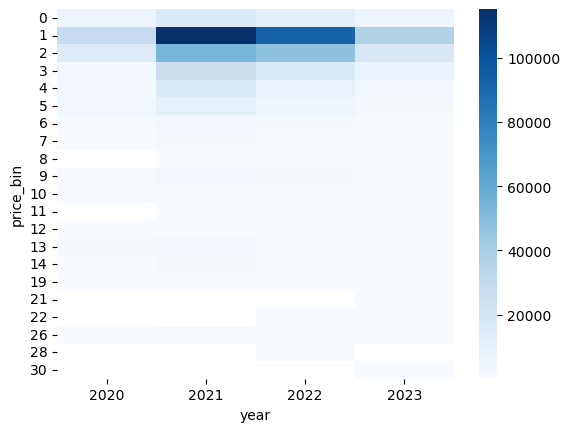

In [17]:
df['price_bin'] = df['price'].apply(lambda x: x//50000)
df['price_bin'].value_counts()

sns.heatmap(df.groupby(['price_bin', 'year'])['customer_id'].count().unstack(), cmap='Blues')

In [18]:
df['gia'] = df['price'].apply(lambda x: 1 if x >= 50000 and x < 200000 else 0)

In [19]:
df[df['gia']==1].shape[0] / df.shape[0]

0.7916786108474332

Khách hàng có xu hướng mua các sản phẩm có giá từ `50000` đến `200000` là nhóm khách hàng tiềm năng. Vì các sản phẩm có giá này chiếm đến `79%` khách hàng mua hàng. Nên nhóm sẽ chọn các khách hàng có xu hướng mua các sản phẩm có giá từ `50000` đến `200000` là nhóm khách hàng tiềm năng.

In [20]:
df['target'] = df['tansuat'] + df['theloai'] + df['khachhang'] + df['tacgia'] + df['gia']
df['target'] = df['target'].apply(lambda x: 1 if x >= 2 else 0)

Ta sẽ chọn `target` là `1` nếu khách hàng thỏa mãn ít nhất 2 điều kiện trong 5 điều kiện trên (có mua hàng theo quý của năm 2023, tần suất mua hàng trong năm 2023, xu hướng mua hàng theo thể loại, xu hướng mua hàng theo tác giả, xu hướng mua hàng the giá) và ngược lại là `0`.

In [21]:
df[df['target']==1].shape[0] / df.shape[0]

0.10896182611218204

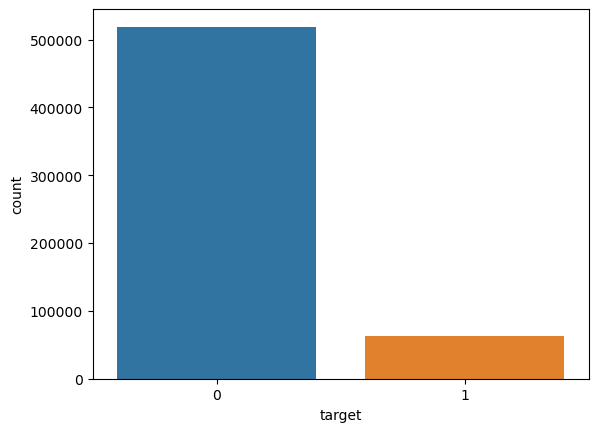

In [22]:
sns.countplot(x='target', data=df)
plt.show()

In [23]:
X = df[['category', 'author_name', 'price', 'quantity_sold', 'rating', 'discount_rate', 'review_count']]
y = df['target']

In [24]:
label_encoder = LabelEncoder()
if 'category' in X.columns:
    X['category'] = label_encoder.fit_transform(X['category'])

if 'author_name' in X.columns:
    X['author_name'] = label_encoder.fit_transform(X['author_name'])

C:\Users\HoaTX\AppData\Local\Temp\ipykernel_18804\3983281232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['category'] = label_encoder.fit_transform(X['category'])
C:\Users\HoaTX\AppData\Local\Temp\ipykernel_18804\3983281232.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['author_name'] = label_encoder.fit_transform(X['author_name'])


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 3. Modeling

Mô hình `Decision Tree Classifier` là một mô hình phân loại đơn giản, dễ hiểu và có thể được sử dụng để tạo ra các quy tắc kinh doanh có thể được sử dụng để xác định khách hàng tiềm năng. Mô hình này tạo ra một cây quyết định, trong đó mỗi nút đại diện cho một thuộc tính và mỗi nhánh đại diện cho một giá trị của thuộc tính đó. Điều này giúp dễ dàng hiểu cách thức hoạt động của mô hình và tại sao nó đưa ra các dự đoán cụ thể.

In [39]:
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print('Decision Tree Classifier:')
print('Accuracy:', accuracy_score(y_test, y_pred1))
print('Recall:', recall_score(y_test, y_pred1))
print('Precision:', precision_score(y_test, y_pred1))
print('F1:', f1_score(y_test, y_pred1))

Decision Tree Classifier:
Accuracy: 0.9096167875380852
Recall: 0.2578836720392432
Precision: 0.7680890538033395
F1: 0.3861264937336054


In [27]:
def decision_tree(X, Y):
    param_grid = {'max_depth': [int(x) for x in np.linspace(5, 20, num = 4)],
                   'min_samples_split': [2, 5, 10],
                   'min_samples_leaf': [1, 2, 4],
                   'criterion': ['gini', 'entropy']
                  }
    dt = DecisionTreeClassifier()
    dt_grid = GridSearchCV(estimator = dt, param_grid = param_grid, scoring='f1')
    dt_grid.fit(X, Y)
    return dt_grid

In [46]:
tree_grid_res1 = decision_tree(X_train, y_train)

In [29]:
tree_grid_res1.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [30]:
tree_grid_res1.best_score_

0.39194342103163304

Mô hình `MultinomialNB` được sử dụng cho dữ liệu đầu vào là các biến phân loại. Trong bài toán dự đoán khách hàng tiềm năng này thì có các biến phân loại như `category`, `author_name`, `price`,... nên mô hình này là một lựa chọn phù hợp. Mô hình có hiệu suất tốt trong các bài toán phân loại dữ liệu phân loại và có thể được huấn luyện nhanh chóng, ngay cả với dữ liệu lớn.

In [52]:
model2 = MultinomialNB()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print('Multinomial Naive Bayes:')
print('Accuracy:', accuracy_score(y_test, y_pred2))
print('Recall:', recall_score(y_test, y_pred2))
print('Precision:', precision_score(y_test, y_pred2))
print('F1:', f1_score(y_test, y_pred2))

Multinomial Naive Bayes:
Accuracy: 0.44150538557267305
Recall: 0.689169197228062
Precision: 0.12656580678373278
F1: 0.21385684083358505


In [54]:
def multinomial_NB(X, Y):
    param_grid = {
        'alpha': [0.01, 0.1, 0.2, 0.3, 0.4 , 0.5, 1.0, 1.5, 2.0] 
    }
    NB1 = MultinomialNB()
    NB1 = GridSearchCV(estimator=NB1, param_grid=param_grid, scoring = 'f1')
    NB1.fit(X, Y)
    return NB1

In [55]:
NB1 = multinomial_NB(X_train, y_train)

In [56]:
NB1.best_params_

{'alpha': 0.01}

In [57]:
NB1.best_score_

0.21293864445241387

Mô hình `Random Forest Classifier` thường có hiệu suất tốt trong các bài toán phân loại, bao gồm cả bài toán dự đoán khách hàng tiềm năng. Điều này là do mô hình Random Forest Classifier kết hợp kết quả của nhiều cây quyết định, giúp giảm thiểu khả năng overfitting. Có thể được huấn luyện nhanh chóng, ngay cả với dữ liệu lớn. Mô hình này có thể cung cấp hiệu suất tốt, dễ hiểu và giải thích, đồng thời có thể xử lý dữ liệu nhiễu tốt.

In [36]:
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print('Random Forest Classifier:')
print('Accuracy:', accuracy_score(y_test, y_pred3))
print('Recall:', recall_score(y_test, y_pred3))
print('Precision:', precision_score(y_test, y_pred3))
print('F1:', f1_score(y_test, y_pred3))

Random Forest Classifier:
Accuracy: 0.9096511178818177
Recall: 0.2600638480105894
Precision: 0.7653528872593951
F1: 0.38821409891323294


In [37]:
def random_forest(X, Y):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [int(x) for x in np.linspace(5, 20, num=4)],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    }
    rf = RandomForestClassifier()
    rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring = 'f1')
    rf_grid.fit(X, Y)
    return rf_grid

In [ ]:
rf_grid = random_forest(X_train, y_train)

In [ ]:
rf_grid.best_params_

In [ ]:
rf_grid.best_score_

Mô hình `Gradient Boosting Classifier` thường có hiệu suất tốt trong các bài toán phân loại, bao gồm cả bài toán dự đoán khách hàng tiềm năng. Điều này là do mô hình Gradient Boosting Classifier kết hợp kết quả của nhiều mô hình yếu, giúp giảm thiểu khả năng overfitting. Có thể được huấn luyện nhanh chóng, ngay cả với dữ liệu lớn. Mô hình này có thể cung cấp hiệu suất tốt, dễ hiểu và giải thích, đồng thời có thể xử lý dữ liệu nhiễu tốt. Khá tương tự với mô hình Random Forest Classifier.

In [ ]:
model4 = GradientBoostingClassifier()
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print('Gradient Boosting Classifier:')
print('Accuracy:', accuracy_score(y_test, y_pred4))
print('Recall:', recall_score(y_test, y_pred4))
print('Precision:', precision_score(y_test, y_pred4))
print('F1:', f1_score(y_test, y_pred4))

Gradient Boosting Classifier:
Accuracy: 0.9012830965970047
Recall: 0.14926419060967064
Precision: 0.7689530685920578
F1: 0.25


In [ ]:
def gradient_boosting(X, Y):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [int(x) for x in np.linspace(5, 20, num=4)],
        'subsample': [0.8, 0.9, 1.0],
    }
    gb = GradientBoostingClassifier()
    gb_grid = GridSearchCV(estimator=gb, param_grid=param_grid, scoring = 'f1')
    gb_grid.fit(X, Y)
    return gb_grid

In [ ]:
gb_grid = gradient_boosting(X_train, y_train)

In [ ]:
gb_grid.best_params_

In [ ]:
gb_grid.best_score_